In [31]:
import numpy as np
import mylibrary.nnlib as nn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

### OR Gate

(200, 2) (200, 1)


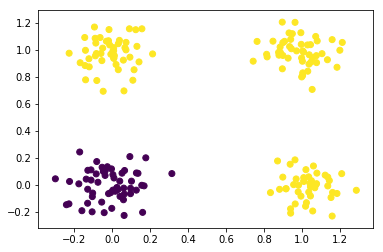

In [32]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[T]])

x = []
y = []
n_data = 200
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.normal(loc=0., scale=0.1, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

## Classical gradient descent method of logistic regression

In [33]:
optimizer = nn.Adam(learning_rate=0.1)
log1 = nn.NonLinearLayer(2 ,1, activation=nn.Sigmoid(), optimizer=optimizer)

_______________________
epoch 0
Loss 0.28472742072044094


_______________________
epoch 10
Loss 0.13760163767603006


_______________________
epoch 20
Loss 0.12520818444945106


_______________________
epoch 30
Loss 0.08547093861129795


_______________________
epoch 40
Loss 0.06761931829845347


_______________________
epoch 50
Loss 0.06106527784148914


_______________________
epoch 60
Loss 0.0534516628970785


_______________________
epoch 70
Loss 0.04731157888232099


_______________________
epoch 80
Loss 0.04362691610668516


_______________________
epoch 90
Loss 0.040689802878860155


_______________________
epoch 100
Loss 0.037901584516026834


_______________________
epoch 110
Loss 0.03552530885632865


_______________________
epoch 120
Loss 0.033578488268868265


_______________________
epoch 130
Loss 0.03187943906092477


_______________________
epoch 140
Loss 0.03034082726374356


_______________________
epoch 150
Loss 0.028960759466968123


_______________________
epoch 16

TclError: this isn't a Tk application

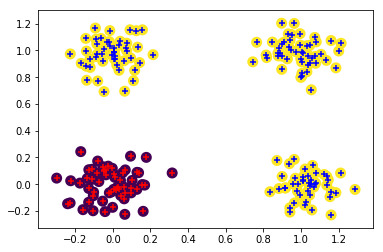

In [34]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

colors = ['r', 'y', 'g', 'b']

for step in range(10000):
    a1 = log1.forward(x)
    loss = nn.CrossEntropyLoss.loss(a1, y)
    dy = nn.CrossEntropyLoss.del_loss(a1, y)
    
    dx = log1.backward(dy)
    log1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = (a1>0.5).astype(int)

        ax.clear()
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
        plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

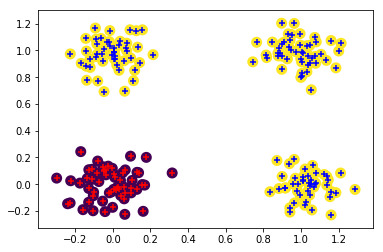

In [35]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors)) 

## Analytical solution to logistic regression

In [36]:
optimizer = nn.SGD(learning_rate=1)
log2 = nn.NonLinearLayer(2 ,1, activation=nn.Sigmoid(), optimizer=optimizer)

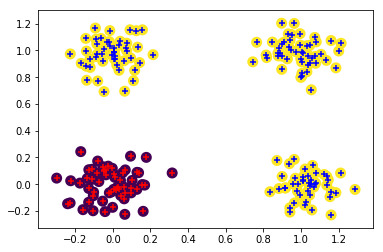

In [37]:
%matplotlib inline
a2 = log2.forward(x)
loss = nn.CrossEntropyBinary.loss(a2, y)
dy = nn.CrossEntropyBinary.del_loss(a2, y)

dx = log2.backward(dy)
log2.update()

out = (a1>0.5).astype(int)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [38]:
log2.del_output

array([[-0.48387088],
       [ 0.51644364],
       [-0.43645254],
       [-0.48957884],
       [-0.56552295],
       [-0.49663995],
       [-0.50242833],
       [-0.55879087],
       [-0.5703184 ],
       [-0.50645573],
       [ 0.50270307],
       [ 0.49751035],
       [ 0.49302035],
       [ 0.52105126],
       [-0.48882167],
       [-0.45487781],
       [-0.42173974],
       [-0.51325782],
       [-0.54067536],
       [-0.50513032],
       [-0.48243728],
       [ 0.50837895],
       [-0.48730238],
       [-0.56230116],
       [-0.49425928],
       [-0.43432679],
       [-0.56426854],
       [-0.484723  ],
       [ 0.5021538 ],
       [-0.49053862],
       [-0.48798685],
       [-0.4902069 ],
       [ 0.5092881 ],
       [-0.41899203],
       [ 0.50946279],
       [-0.4317614 ],
       [-0.55397362],
       [-0.55896981],
       [ 0.50433487],
       [-0.56725901],
       [-0.48465517],
       [ 0.49569258],
       [-0.42752558],
       [-0.43812498],
       [-0.5163289 ],
       [-0

In [39]:
log2.del_zee

array([[-0.12084184],
       [ 0.12897127],
       [-0.10735062],
       [-0.12234154],
       [-0.1389528 ],
       [-0.12415438],
       [-0.12560412],
       [-0.13776633],
       [-0.13975956],
       [-0.12659283],
       [ 0.12567209],
       [ 0.1243745 ],
       [ 0.12323107],
       [ 0.13003191],
       [-0.12214434],
       [-0.11279331],
       [-0.10285192],
       [-0.12822424],
       [-0.1342743 ],
       [-0.12626929],
       [-0.12046051],
       [ 0.12705904],
       [-0.12174703],
       [-0.13839275],
       [-0.12354853],
       [-0.10670846],
       [-0.13873645],
       [-0.12106762],
       [ 0.12553612],
       [-0.12259074],
       [-0.12192629],
       [-0.12250471],
       [ 0.12727809],
       [-0.10199846],
       [ 0.12732008],
       [-0.10592985],
       [-0.1368796 ],
       [-0.13779867],
       [ 0.12607424],
       [-0.1392486 ],
       [-0.12104967],
       [ 0.12391395],
       [-0.1046358 ],
       [-0.10785388],
       [-0.12894456],
       [-0

In [40]:
log2.zee

array([[ 0.06453889],
       [ 0.06579828],
       [ 0.25557191],
       [ 0.04169067],
       [-0.26360777],
       [ 0.01344039],
       [-0.00971339],
       [-0.23625632],
       [-0.28315035],
       [-0.02582436],
       [ 0.01081237],
       [-0.00995868],
       [-0.0279204 ],
       [ 0.08425484],
       [ 0.04472076],
       [ 0.18098115],
       [ 0.31563564],
       [-0.05304373],
       [-0.16306179],
       [-0.02052202],
       [ 0.07027978],
       [ 0.03351892],
       [ 0.05080142],
       [-0.25050646],
       [ 0.02296389],
       [ 0.26421931],
       [-0.25850412],
       [ 0.06112705],
       [ 0.00861527],
       [ 0.03785003],
       [ 0.04806184],
       [ 0.03917743],
       [ 0.03715666],
       [ 0.32691256],
       [ 0.03785567],
       [ 0.27466826],
       [-0.21673897],
       [-0.23698213],
       [ 0.01733991],
       [-0.27067663],
       [ 0.06139862],
       [-0.01723012],
       [ 0.29195392],
       [ 0.24877523],
       [-0.06533884],
       [ 0

In [41]:
log2.del_weights

array([[-0.06240729],
       [-0.05405228]])

In [42]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [43]:
classxy = log2.forward(xxyy)
classxyi = (classxy > 0.5).astype(int)

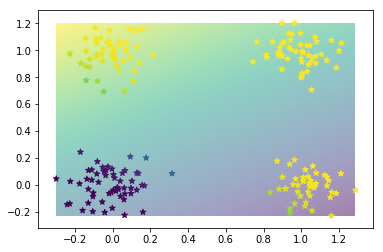

In [44]:
# advanced way of showing
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')

# plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
# plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,0], x[:, 1], c=a1.reshape(-1), marker='*')

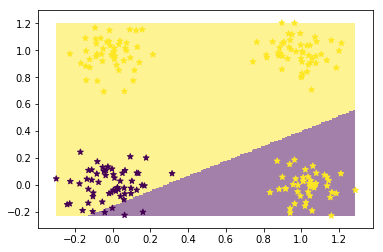

In [45]:
# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=matplotlib.colors.ListedColormap(colors[2:]),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

In [46]:
log2.weights, log2.bias

(array([[-0.17907196],
        [ 0.32207881]]), array([0.05069188]))

In [47]:
classxy = log1.forward(xxyy)
classxyi = (classxy > 0.5).astype(int)

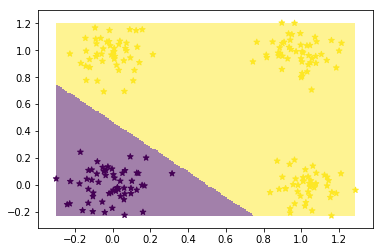

In [48]:
# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=matplotlib.colors.ListedColormap(colors[2:]),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

In [49]:
log1.weights, log1.bias

(array([[7.18867253],
        [7.69820619]]), array([-3.59775953]))

In [50]:
l1ws = np.copy(log1.weights)
l1bs = np.copy(log1.bias)

In [51]:
l1ws[1]/l1ws[0]

array([1.07088008])

In [52]:
l1ws[0]/l1bs

array([-1.998097])

In [57]:
# way done as found on the internet
# the gradient is not propagated through sigmoid
optimizer = nn.Adam(learning_rate=0.1)
log1 = nn.LinearLayer(2 ,1, optimizer=optimizer)
sigmoid = nn.Sigmoid()

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    z1 = log1.forward(x)
    a1 = sigmoid.forward(z1)
    
    loss = nn.CrossEntropyLoss.loss(a1, y)
    dy = nn.CrossEntropyLoss.del_loss(a1, y)
    
    dx = log1.backward(dy)
    log1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = (a1>0.5).astype(int)

        ax.clear()
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
        plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.6089223567526244


_______________________
epoch 100
Loss 0.03858765327825669


_______________________
epoch 200
Loss 0.018956173121254888


_______________________
epoch 300
Loss 0.012386583357861027


_______________________
epoch 400
Loss 0.009141903769869966


_______________________
epoch 500
Loss 0.007221581074062758


_______________________
epoch 600
Loss 0.00595451025470483


_______________________
epoch 700
Loss 0.00505544675879024


_______________________
epoch 800
Loss 0.004383486745255723


_______________________
epoch 900
Loss 0.003861338902087648


_______________________
epoch 1000
Loss 0.003443185580595399


_______________________
epoch 1100
Loss 0.003100188927833951


_______________________
epoch 1200
Loss 0.0028133101071334044


_______________________
epoch 1300
Loss 0.002569479505252635


_______________________
epoch 1400
Loss 0.0023594289271036957


_______________________
epoch 1500
Loss 0.0021764027605089974


______



_______________________
epoch 12900
Loss 1.251048226513217e-05


_______________________
epoch 13000
Loss 1.220771496976207e-05


_______________________
epoch 13100
Loss 1.1918199388820989e-05


_______________________
epoch 13200
Loss 1.1641183078702671e-05


_______________________
epoch 13300
Loss 1.1375960473549925e-05


_______________________
epoch 13400
Loss 1.112187016533146e-05


_______________________
epoch 13500
Loss 1.0878292276962007e-05


_______________________
epoch 13600
Loss 1.0644645937259428e-05


_______________________
epoch 13700
Loss 1.0420386864062304e-05


_______________________
epoch 13800
Loss 1.0205005059781346e-05


_______________________
epoch 13900
Loss 9.998022621609548e-06


_______________________
epoch 14000
Loss 9.798991667144582e-06


_______________________
epoch 14100
Loss 9.607492374626707e-06


_______________________
epoch 14200
Loss 9.423131136158853e-06


_______________________
epoch 14300
Loss 9.245538820942397e-06


________________



_______________________
epoch 25600
Loss 2.952182789048086e-06


_______________________
epoch 25700
Loss 2.9345974652337513e-06


_______________________
epoch 25800
Loss 2.917221609711359e-06


_______________________
epoch 25900
Loss 2.9000514921970167e-06


_______________________
epoch 26000
Loss 2.8830834705947018e-06


_______________________
epoch 26100
Loss 2.866313988396035e-06


_______________________
epoch 26200
Loss 2.8497395721900174e-06


_______________________
epoch 26300
Loss 2.8333568292477443e-06


_______________________
epoch 26400
Loss 2.817162445172671e-06


_______________________
epoch 26500
Loss 2.8011531816736024e-06


_______________________
epoch 26600
Loss 2.7853258743848984e-06


_______________________
epoch 26700
Loss 2.769677430759451e-06


_______________________
epoch 26800
Loss 2.754204828033294e-06


_______________________
epoch 26900
Loss 2.7389051113090465e-06


_______________________
epoch 27000
Loss 2.7237753915811072e-06


______________

TclError: can't invoke "update" command: application has been destroyed

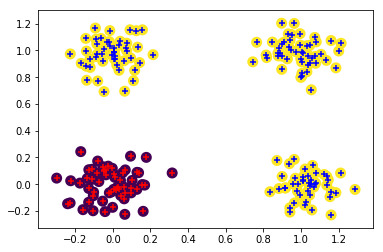

In [56]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors)) 